<a href="https://colab.research.google.com/github/Czyundream/Leetcodetest/blob/main/%E8%AF%AF%E5%B7%AE%E8%A1%A5%E5%81%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#导入常用库
!pip install git+https://github.com/d2l-ai/d2l-zh@release  # installing d2l


In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

In [ ]:
import pandas as pd

In [ ]:
#读取文件
!pip install -u -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'1C2cnS5fi2Du6UcCbShpj1W2AaFD49huD'})
downloaded.GetContentFile('250HZ.xlsx')



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [ ]:
def xlsx_to_csv():
    data_xls=pd.read_excel('250HZ.xlsx')
    data_xls.to_csv('250HZ.csv',encoding='utf-8')

xlsx_to_csv()

In [ ]:
data = pd.read_csv('250HZ.csv')
print(data)

      Unnamed: 0       光电           磁         温度        误差
0              0  358.375  359.331207  17.201250  0.956207
1              1  357.750  358.604736  17.242500  0.854736
2              2  357.000  357.823334  17.366249  0.823334
3              3  356.250  357.070068  17.325001  0.820068
4              4  355.500  356.318909  17.407499  0.818909
...          ...      ...         ...        ...       ...
1904        1904    1.125    1.896515  17.118750  0.771515
1905        1905    0.750    1.599884  17.283751  0.849884
1906        1906    0.500    1.349945  17.242500  0.849945
1907        1907    0.375    1.239395  17.283751  0.864395
1908        1908    0.000    0.819855  17.160000  0.819855

[1909 rows x 5 columns]


In [ ]:
inputs , outputs= data.iloc[477: 1909, 2 : 4] , data.iloc[477 : 1909, 1]
features, labels = torch.tensor(inputs.values), torch.tensor(outputs.values)
features

tensor([[359.8888,  17.4488],
        [359.7233,  17.3662],
        [359.5290,  17.1600],
        ...,
        [  1.3499,  17.2425],
        [  1.2394,  17.2838],
        [  0.8199,  17.1600]], dtype=torch.float64)

In [ ]:
#获取最小误差处的索引
min_index = torch.argmin(torch.abs(features[:, 1]))
min_index

tensor(1271)

In [ ]:
wu = data.iloc[477: 1909, 4]
wu = torch.tensor(wu.values)

In [ ]:
features[:, 1].detach().numpy()

array([17.44875 , 17.366249, 17.16    , ..., 17.2425  , 17.283751,
       17.16    ])

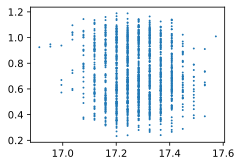

In [ ]:
i = range(len(features[:, 1]))
d2l.set_figsize()
#d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1);
d2l.plt.scatter(features[:, 1].detach().numpy(), wu.detach().numpy(), 1);
#d2l.plt.plot(i, features[:, 1].detach().numpy());

In [ ]:
bc = torch.randn_like(wu)
#for i in range(len(bc)):
#    bc[i] = features[]
bc = features[:, 1]/wu
bc

tensor([19.6326, 17.8433, 18.9831,  ..., 20.2866, 19.9952, 20.9305],
       dtype=torch.float64)

In [ ]:
def findt(T, features):
    x = 0
    y = 100
    W = features[:, 1]
    for i in range(len(W)):
        if W[i]-T == 0:
            x = i
            return x
        elif y <= abs(W[i]-T):
            continue
        elif y > abs(W[i]-T):
            x = i
            y = abs(W[i]-T)
    return x

In [ ]:
def op(x, T, features):
    if x > 2:
        i = (bc[x-1]+ 12*bc[x] + bc[x+1])/14
    else:
        i = (12*bc[x] + bc[x+1] + bc[x+2])/14
    return T/i

In [ ]:
test_indata, test_outdata = data.iloc[0: 477, 2 : 4] , data.iloc[0 : 477, 1]
test_indata, test_outdata = torch.tensor(test_indata.values), torch.tensor(test_outdata.values)
m = test_indata[:, 1]
n = test_indata[:, 0]
new_n = torch.zeros_like(n)
for i in range(len(test_indata[:, 1])):
    x = findt(m[i], features)
    b = op(x, m[i], features)
    new_n[i] = n[i] - b

AttributeError: ignored

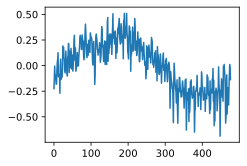

In [ ]:
error=test_outdata-new_n
i = range(len(error))
d2l.plt.plot(i, error);

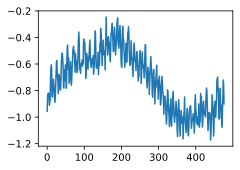

In [ ]:
real=test_outdata-n
d2l.plt.plot(i, real);

In [ ]:
features = torch.tensor(features, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.float32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


#LSTM尝试
----


In [2]:
import torch
from torch import nn
from d2l import torch as d2l
import pandas as pd
from torch.utils import data
import numpy as np

In [3]:
!pip install -u -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'1C2cnS5fi2Du6UcCbShpj1W2AaFD49huD'})
downloaded.GetContentFile('250HZ.xlsx')


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [4]:
def xlsx_to_csv():
    data_xls=pd.read_excel('250HZ.xlsx')
    data_xls.to_csv('250HZ.csv',encoding='utf-8')

xlsx_to_csv()

In [5]:
data1 = pd.read_csv('250HZ.csv')
print(data1)

      Unnamed: 0       光电           磁         温度        误差
0              0  358.375  359.331207  17.201250  0.956207
1              1  357.750  358.604736  17.242500  0.854736
2              2  357.000  357.823334  17.366249  0.823334
3              3  356.250  357.070068  17.325001  0.820068
4              4  355.500  356.318909  17.407499  0.818909
...          ...      ...         ...        ...       ...
1904        1904    1.125    1.896515  17.118750  0.771515
1905        1905    0.750    1.599884  17.283751  0.849884
1906        1906    0.500    1.349945  17.242500  0.849945
1907        1907    0.375    1.239395  17.283751  0.864395
1908        1908    0.000    0.819855  17.160000  0.819855

[1909 rows x 5 columns]


In [6]:
inputs , outputs= data1.iloc[477: 1909, 2 : 4] , data1.iloc[477 : 1909, 4]
features, labels = torch.tensor(inputs.values), torch.tensor(outputs.values)
features

tensor([[359.8888,  17.4488],
        [359.7233,  17.3662],
        [359.5290,  17.1600],
        ...,
        [  1.3499,  17.2425],
        [  1.2394,  17.2838],
        [  0.8199,  17.1600]], dtype=torch.float64)

In [34]:
#归一化处理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sca_X = scaler.fit_transform(features)
New_X = torch.from_numpy(sca_X)
print(New_X.shape)

torch.Size([1432, 2])


In [35]:
#构造特征向量X
mem_data_time = 5

from collections import deque
deq = deque(maxlen=mem_data_time)

X=[]
for i in sca_X:
    deq.append(list(i))
    if len(deq)==mem_data_time:
        X.append(list(deq))
 

In [36]:
#构造特征向量y--labels
y = labels[mem_data_time-1:]
print(y.shape)

torch.Size([1428])


In [8]:
def load_array(data_arrays, batch_size, is_train=True):
    '''构造一个PyTorch数据迭代器'''
    dataset = data.TensorDataset(*data_arrays)#将数据转为dataset，*表示将元组拆解为一维数字作为传入参数
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
    #将dataset型数据挑选batch_size大小的样本，shuffle控制是否打乱

In [37]:
#X = np.array(New_X) 
X = np.array(X)
#y = np.array(labels) 
y = np.array(y)
print(X.shape)
print(y.shape)

(1428, 5, 2)
(1428,)


In [75]:
batch_size = 10
New_X = torch.from_numpy(X).to(torch.float32)
New_y = torch.from_numpy(y).to(torch.float32)
data_iter = load_array((New_X, New_y), batch_size)

next(iter(data_iter))

tensor([0, 0, 0,  ..., 0, 0, 0])


[tensor([[[-0.2150, -2.0126],
          [-0.2167, -1.5882],
          [-0.2184, -0.3148],
          [-0.2215,  0.9586],
          [-0.2237,  2.2319]],
 
         [[ 0.9668,  0.9586],
          [ 0.9645,  0.9586],
          [ 0.9607,  0.5341],
          [ 0.9590,  0.1097],
          [ 0.9571, -0.3148]],
 
         [[-0.1277,  0.5341],
          [-0.1298, -1.1637],
          [-0.1319, -1.5882],
          [-0.1358, -1.1637],
          [-0.1378, -0.3148]],
 
         [[-0.2167, -1.5882],
          [-0.2184, -0.3148],
          [-0.2215,  0.9586],
          [-0.2237,  2.2319],
          [-0.2251, -0.7392]],
 
         [[ 1.3160, -0.3148],
          [ 1.3146, -0.3148],
          [ 1.3124,  1.3830],
          [ 1.3091,  1.8075],
          [ 1.3074, -0.3148]],
 
         [[ 0.9057, -0.3148],
          [ 0.9013,  0.5341],
          [ 0.8998, -0.3148],
          [ 0.8974,  0.1097],
          [ 0.8936,  0.1097]],
 
         [[ 0.3634,  0.5341],
          [ 0.3615,  0.9586],
          [ 0.3594,  0

In [39]:
#拆分训练集与测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [66]:
class LSTM(nn.Module):
    def __init__(self, num_feature, hidden_num, bag_exm_num):
        super().__init__()
        
        self.num_feature = num_feature
        self.hidden_num = hidden_num
        self.bag_exm_num = bag_exm_num

        self.lstm = nn.LSTM(input_size = num_feature , hidden_size = hidden_num, batch_first = True, num_layers = 3, bidirectional = False)#不适用dropout
        self.dropout = nn.Dropout(0.2)
        self.flatten = nn.Flatten(1, 2)
        self.linear = nn.Linear(160, 1)

        self.cross_entroy = nn.CrossEntropyLoss()
    
    def forward(self, X):

        hidden,(h_0, c_0) = self.lstm(X)
        #print(hidden.shape)
        hidden_drop = self.dropout(hidden)
        #print("hidden_Drop的shape",hidden_drop.shape)
        flatten_hidden = self.flatten(hidden_drop)
        #print("flatten_hidden的shape",flatten_hidden.shape)
        pre = self.linear(flatten_hidden)
        #print(pre.shape)
        return pre

In [78]:
#训练

num_feature = 2
hidden_num = 32
lr = 0.001
num_epochs = 100

net = LSTM(num_feature, hidden_num, 10)
#net = net(num_feature, hidden_num, batch_size)
optimizer = torch.optim.AdamW(net.parameters(), lr = lr)
loss = nn.MSELoss()
for epoch in range(num_epochs):
    for x_train, y_train in data_iter:

        #y_train = y_train.float()
        pre = net(x_train)
        #print("pre的shape",pre.shape)
        #pre = pre.float()
        l = loss(pre, y_train)
        #l = net.cross_entroy(pre, y_train)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

    if epoch % 10 == 0:
        l = loss(net(New_X), New_y)
        print(f'epoch{epoch + 1}, loss{l:f}')#l:f打印l，格式为浮点数



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1428])) that is different to the input size (torch.Size([1428, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, 

epoch1, loss0.054383
epoch11, loss0.049296
epoch21, loss0.048850
epoch31, loss0.049097
epoch41, loss0.048966
epoch51, loss0.048764
epoch61, loss0.048688
epoch71, loss0.048598
epoch81, loss0.049176
epoch91, loss0.049223


In [ ]:
#构建LSTM神经网络
from torch import nn
net = nn.Sequential(
    nn.LSTM(input_size=2, hidden_size=10, dropout=0.1),
    nn.ReLU(),
    nn.Linear(10,1)
    )

In [ ]:
#训练
epoch_size = 100


In [ ]:
num_layer = 3
batch_size = 32
h0 = torch.randn(num_layer, batch_size, 10)
c0 = torch.randn(num_layer, batch_size, 10)

In [ ]:
def train_epoch_ch8(net, train_iter, loss, updater, device, use_random_iter):
    """训练网络一个迭代周期（定义见第8章）"""
    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(2)  # 训练损失之和,词元数量
    for X, Y in train_iter:
        if state is None or use_random_iter:
            # 在第一次迭代或使用随机抽样时初始化state
            state = net.begin_state(batch_size=X.shape[0], device=device)
        else:
            if isinstance(net, nn.Module) and not isinstance(state, tuple):
                # state对于nn.GRU是个张量
                state.detach_()
            else:
                # state对于nn.LSTM或对于我们从零开始实现的模型是个张量
                for s in state:
                    s.detach_()
        y = Y.T.reshape(-1)
        X, y = X.to(device), y.to(device)
        y_hat, state = net(X, state)
        l = loss(y_hat, y.long()).mean()
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            grad_clipping(net, 1)
            updater.step()
        else:
            l.backward()
            grad_clipping(net, 1)
            # 因为已经调用了mean函数
            updater(batch_size=1)
        metric.add(l * y.numel(), y.numel())
    return math.exp(metric[0] / metric[1]), metric[1] / timer.stop()

In [ ]:
def train_ch8(net, train_iter, vocab, lr, num_epochs, device,
              use_random_iter=False):
    """训练模型（定义见第8章）"""
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', ylabel='perplexity',
                            legend=['train'], xlim=[10, num_epochs])
    # 初始化
    updater = torch.optim.SGD(net.parameters(), lr)
    predict = lambda prefix: predict_ch8(prefix, 50, net, vocab, device)
    # 训练和预测
    for epoch in range(num_epochs):
        ppl, speed = train_epoch_ch8(
            net, train_iter, loss, updater, device, use_random_iter)
        if (epoch + 1) % 10 == 0:
            print(predict('time traveller'))
            animator.add(epoch + 1, [ppl])
    print(f'困惑度 {ppl:.1f}, {speed:.1f} 词元/秒 {str(device)}')
    print(predict('time traveller'))
    print(predict('traveller'))

In [ ]:
rnn = nn.LSTM(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
c0 = torch.randn(2, 3, 20)
output, (hn, cn) = rnn(input, (h0, c0))
print(input.shape)

In [ ]:
vocab_size, num_hiddens, device = 5, 256, d2l.try_gpu()
num_epochs, lr = 500, 1

num_inputs = vocab_size
lstm_layer = nn.LSTM(num_inputs, num_hiddens)
model = d2l.RNNModel(lstm_layer, 2)
model = model.to(device)
d2l.train_ch8(model, X, 5, lr, num_epochs, device)

#另一设想
----

In [ ]:
def load_array(data_arrays, batch_size, is_train=True):
    '''构造一个PyTorch数据迭代器'''
    dataset = data.TensorDataset(*data_arrays)#将数据转为dataset，*表示将元组拆解为一维数字作为传入参数
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
    #将dataset型数据挑选batch_size大小的样本，shuffle控制是否打乱

batch_size = 50
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

In [ ]:
from torch import nn#nn为神经网络的缩写

net = nn.Sequential(nn.Linear(2, 1))#Linear为全连接层，需要指定输入维度和输出维度
#Sequential可以理解为容器，即list of layers

In [ ]:
net[0].weight.data.normal_(1, 0.01)#normal_为使用正态分布替换掉data的值
net[0].bias.data.fill_(0)#bias为偏差

tensor([0.])

In [ ]:
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.003)#optim.SGD需要指定两个参数：net.parameters()为拿出所有参数，lr学习率

In [ ]:
num_epochs = 20
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch{epoch + 1}, loss{l:f}')#l:f打印l，格式为浮点数

RuntimeError: ignored

#磁数据补偿
---
start

In [ ]:
import numpy as np
import torch
from torch.utils import data
#from d2l import torch as d2l
import pandas as pd

In [ ]:
!pip install -u -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'1vSjcohcF_sefqy_-_7grnnnhlv2VvB1o'})
downloaded.GetContentFile('data_ci.csv')

In [ ]:
data = pd.read_csv('data_ci.csv')
print(data)

In [ ]:
inputs1, outputs1 = data.iloc[:, 1], data.iloc[:, 2]
inputs1 = inputs1.dropna(how = 'any')
outputs1 = outputs1.dropna(how = 'any')
inputs1.shape, outputs1.shape

In [ ]:
features1, labels1 = torch.tensor(inputs1.values), torch.tensor(outputs1.values)

In [ ]:
i = np.arange(1, len(features1)+1)
d2l.set_figsize()
#d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1);
d2l.plt.scatter(i, features1.detach().numpy(), 1);

In [ ]:
d2l.set_figsize()
#d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1);
d2l.plt.scatter(i, labels1.detach().numpy(), 1);

In [ ]:
d2l.set_figsize()
#d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1);
d2l.plt.scatter(labels1.detach().numpy(), features1.detach().numpy(), 1);

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(features1.detach().numpy(), labels1.detach().numpy(), 1);

In [ ]:
w = torch.ones_like(features1)